In [31]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline 

In [2]:
df = pd.read_csv("titanic-train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

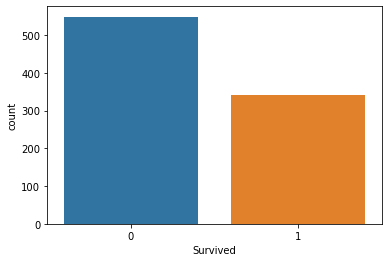

In [7]:
sns.countplot(data = df ,x = "Survived")

<AxesSubplot:xlabel='Survived', ylabel='count'>

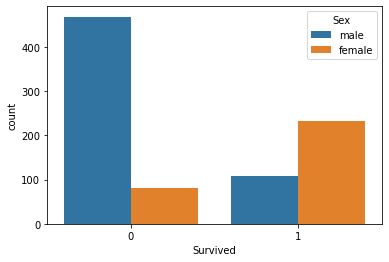

In [8]:
sns.countplot(x = "Survived" , hue = "Sex" , data =df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

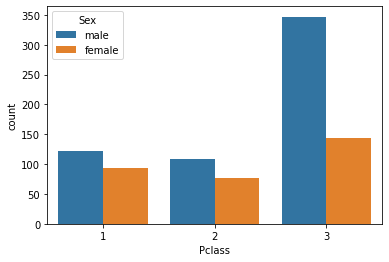

In [9]:
sns.countplot(x = "Pclass" , hue = "Sex" , data = df)

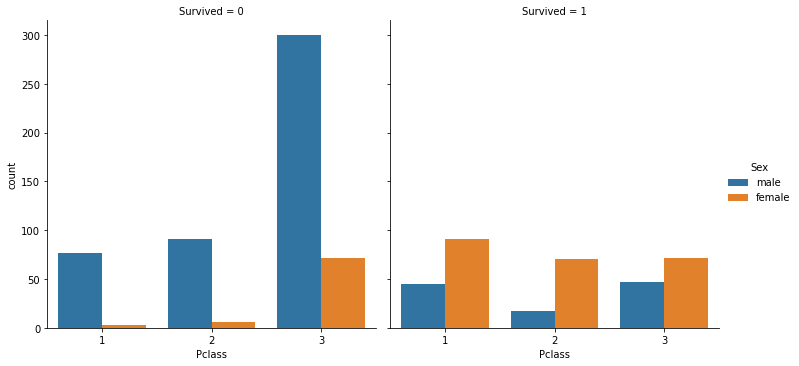

In [10]:
sns.catplot(x = "Pclass" , hue="Sex" , col="Survived" , data = df , kind="count")

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Density'>

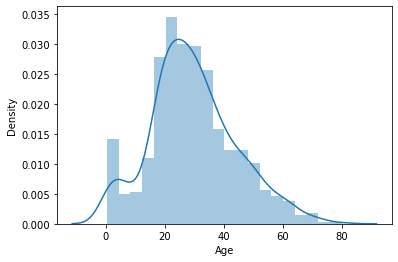

In [12]:
sns.distplot(df["Age"].dropna())

<AxesSubplot:xlabel='Fare'>

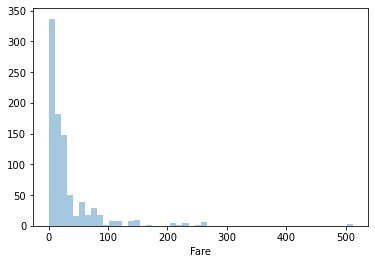

In [13]:
sns.distplot(df["Fare"] , kde = False)

###  Data Cleaning 


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

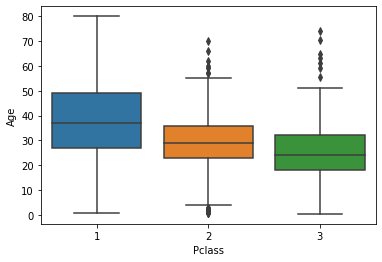

In [14]:
sns.boxplot(x = "Pclass", y = "Age" , data = df)

#### we are now replacing the missing ages with its mean value 

In [15]:
def impute_age(cols):
    age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return age

In [16]:
# apply() : Apply a function along an axis of the DataFrame.
df["Age"] = df[["Age" , "Pclass"]].apply(impute_age , axis = 1)

<AxesSubplot:>

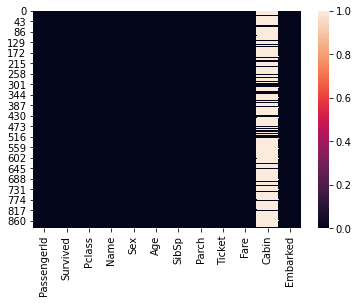

In [17]:
sns.heatmap(data = df.isnull())

#### we have to drop cabin column also , as it contains so many null values

In [18]:
df.drop(labels="Cabin" , axis = 1 , inplace=True)

In [19]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [20]:
df= df.dropna(subset=["Embarked"] )

In [21]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

###  Converting categorical to dummy variables

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


#### Sex and Embarked are 2 categorical variables

In [23]:
sex = pd.get_dummies(data = df["Sex"] , drop_first=True)
embarked = pd.get_dummies(data = df["Embarked"] , drop_first=True)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [25]:
df.drop(["PassengerId", "Name", "Sex" , "Parch", "Ticket", "Embarked"], axis = 1, inplace=True )

In [26]:
df = pd.concat([df,sex,embarked] , axis=1)
df

,Survived,Pclass,Age,SibSp,Fare,male,Q,S
0,0,3,22.0,1,7.2500,1,0,1
1,1,1,38.0,1,71.2833,0,0,0
2,1,3,26.0,0,7.9250,0,0,1
3,1,1,35.0,1,53.1000,0,0,1
4,0,3,35.0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,13.0000,1,0,1
887,1,1,19.0,0,30.0000,0,0,1
888,0,3,24.0,1,23.4500,0,0,1
889,1,1,26.0,0,30.0000,1,0,0


### Building simple classification model

#### step1 : dividing the dataset into dependent and inpendent variables

In [28]:
X = df.drop(["Survived"] , axis=1)
y = df["Survived"]

In [29]:
X

,Pclass,Age,SibSp,Fare,male,Q,S
0,3,22.0,1,7.2500,1,0,1
1,1,38.0,1,71.2833,0,0,0
2,3,26.0,0,7.9250,0,0,1
3,1,35.0,1,53.1000,0,0,1
4,3,35.0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...
886,2,27.0,0,13.0000,1,0,1
887,1,19.0,0,30.0000,0,0,1
888,3,24.0,1,23.4500,0,0,1
889,1,26.0,0,30.0000,1,0,0


In [30]:

y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

#### step2: spliting the data into train and test dataset

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=0.2, random_state=42)

In [33]:
X_train

,Pclass,Age,SibSp,Fare,male,Q,S
708,1,22.0,0,151.5500,0,0,1
240,3,24.0,1,14.4542,0,0,0
382,3,32.0,0,7.9250,1,0,1
792,3,24.0,8,69.5500,0,0,1
683,3,14.0,5,46.9000,1,0,1
...,...,...,...,...,...,...,...
107,3,24.0,0,7.7750,1,0,1
271,3,25.0,0,0.0000,1,0,1
862,1,48.0,0,25.9292,0,0,1
436,3,21.0,2,34.3750,0,0,1


In [34]:
X_test

,Pclass,Age,SibSp,Fare,male,Q,S
281,3,28.0,0,7.8542,1,0,1
435,1,14.0,1,120.0000,0,0,1
39,3,14.0,1,11.2417,0,0,0
418,2,30.0,0,13.0000,1,0,1
585,1,18.0,0,79.6500,0,0,1
...,...,...,...,...,...,...,...
433,3,17.0,0,7.1250,1,0,1
807,3,18.0,0,7.7750,0,0,1
25,3,38.0,1,31.3875,0,0,1
85,3,33.0,3,15.8500,0,0,1


#### Step3 : Building the model

In [35]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [36]:
# fit the model according to given training data
lr.fit(X_train , y_train)

LogisticRegression()

In [38]:
y_pred = lr.predict(X_test)

####  step4: Checking accuracy

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_pred)
cm

array([[88, 21],
       [15, 54]], dtype=int64)

In [41]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test , y_pred)
acc

0.797752808988764

In [45]:
print("Accuracy score is {:2f} %".format(acc*100))

Accuracy score is 79.775281 %
